In [1]:
# To use PySpark from Jupyter Notebook
import findspark
findspark.init()

![](https://i.ytimg.com/vi/_C8kWso4ne4/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLCddYd_I3xvvPYM4k98MjdyMdVDUw)

# <span style='color: orange'>PySpark</span> is inteface (API) for Apache Spark in python

In [2]:
import pyspark
import pandas as pd

In [3]:
data = pd.read_csv('ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
# Create PySpark session
from pyspark.sql import SparkSession

# getOrCreate() returns an already existing SparkSession; if it doesn't exist, a new SparkSession is created.
spark = SparkSession.builder.appName('Practise').getOrCreate()
spark

# [pyspark.sql.SparkSession](https://spark.apache.org/docs/2.4.0/api/python/pyspark.sql.html#pyspark.sql.SparkSession)

In [5]:
# Read dataset
data = spark.read.csv('ds_salaries.csv')
data

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string]

In [6]:
# Let's set correct header
data = spark.read.option('header', 'true').csv('ds_salaries.csv')
data.show()

+---+---------+----------------+---------------+--------------------+--------+---------------+-------------+------------------+------------+----------------+------------+
|_c0|work_year|experience_level|employment_type|           job_title|  salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---+---------+----------------+---------------+--------------------+--------+---------------+-------------+------------------+------------+----------------+------------+
|  0|     2020|              MI|             FT|      Data Scientist|   70000|            EUR|        79833|                DE|           0|              DE|           L|
|  1|     2020|              SE|             FT|Machine Learning ...|  260000|            USD|       260000|                JP|           0|              JP|           S|
|  2|     2020|              SE|             FT|   Big Data Engineer|   85000|            GBP|       109024|                GB|          50|     

In [7]:
type(data)

pyspark.sql.dataframe.DataFrame

In [8]:
# First observation
data.head(1)

[Row(_c0='0', work_year='2020', experience_level='MI', employment_type='FT', job_title='Data Scientist', salary='70000', salary_currency='EUR', salary_in_usd='79833', employee_residence='DE', remote_ratio='0', company_location='DE', company_size='L')]

In [9]:
# Prints out the schema in the tree format
data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- work_year: string (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: string (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: string (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: string (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)



# Part 2

In [10]:
# Creating test dataframe
df = pd.DataFrame({
    'Name': ['Krish', 'Sudhanshu', 'Sunny'],
    'age': [31, 30, 29],
    'Experience': [10, 8, 4]
})
df

,Name,age,Experience
0,Krish,31,10
1,Sudhanshu,30,8
2,Sunny,29,4


In [11]:
from pyspark.sql import SparkSession

In [12]:
# Start session
spark = SparkSession.builder.appName('Dataframe').getOrCreate()
spark  # We got one master node (local computer)

In [13]:
# Save our dataframe and read it using PySpark
df.to_csv('df.csv')

df_pyspark = spark.read.option('header', 'true').csv('df.csv')
df_pyspark.show()

+---+---------+---+----------+
|_c0|     Name|age|Experience|
+---+---------+---+----------+
|  0|    Krish| 31|        10|
|  1|Sudhanshu| 30|         8|
|  2|    Sunny| 29|         4|
+---+---------+---+----------+



In [14]:
# Print Schema
df_pyspark.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- age: string (nullable = true)
 |-- Experience: string (nullable = true)



By default type of values is string

In [15]:
# Let's get right types (inferSchema=True)
pyspark = spark.read.option('header', 'true').csv('df.csv',
                                                 inferSchema=True)
pyspark.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)



In [16]:
pyspark.columns

['_c0', 'Name', 'age', 'Experience']

In [17]:
pyspark.head(3)

[Row(_c0=0, Name='Krish', age=31, Experience=10),
 Row(_c0=1, Name='Sudhanshu', age=30, Experience=8),
 Row(_c0=2, Name='Sunny', age=29, Experience=4)]

Let's get data from column 'Name'

In [18]:
pyspark.select('Name')

DataFrame[Name: string]

In [19]:
# To see entire column
pyspark.select('Name').show()  # type: pyspark.sql.dataframe.DataFrame

+---------+
|     Name|
+---------+
|    Krish|
|Sudhanshu|
|    Sunny|
+---------+



In [20]:
# To see multiple columns
pyspark.select(['Name', 'age']).show()  # slices aren't working here

+---------+---+
|     Name|age|
+---------+---+
|    Krish| 31|
|Sudhanshu| 30|
|    Sunny| 29|
+---------+---+



In [21]:
# Without select we can't obtain data
pyspark.Name

Column<'Name'>

In [22]:
# Let's see data types
pyspark.dtypes

[('_c0', 'int'), ('Name', 'string'), ('age', 'int'), ('Experience', 'int')]

In [23]:
# Describe attribute (like in Pandas)
pyspark.describe().show()

+-------+---+-----+----+-----------------+
|summary|_c0| Name| age|       Experience|
+-------+---+-----+----+-----------------+
|  count|  3|    3|   3|                3|
|   mean|1.0| null|30.0|7.333333333333333|
| stddev|1.0| null| 1.0|3.055050463303893|
|    min|  0|Krish|  29|                4|
|    max|  2|Sunny|  31|               10|
+-------+---+-----+----+-----------------+



In [24]:
# Add column in PySpark dataframe
pyspark = pyspark.withColumn('Experience After 2 years', 
                   pyspark['Experience'] + 2)
pyspark.show()

+---+---------+---+----------+------------------------+
|_c0|     Name|age|Experience|Experience After 2 years|
+---+---------+---+----------+------------------------+
|  0|    Krish| 31|        10|                      12|
|  1|Sudhanshu| 30|         8|                      10|
|  2|    Sunny| 29|         4|                       6|
+---+---------+---+----------+------------------------+



# [pyspark.sql.DataFrame.withColumn](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)

In [25]:
# Drop column in PySpark
pyspark = pyspark.drop('Experience After 2 years')
pyspark.show()

+---+---------+---+----------+
|_c0|     Name|age|Experience|
+---+---------+---+----------+
|  0|    Krish| 31|        10|
|  1|Sudhanshu| 30|         8|
|  2|    Sunny| 29|         4|
+---+---------+---+----------+



In [26]:
# Rename column in PySpark (without save it)
pyspark.withColumnRenamed('Name', 'New name').show()

+---+---------+---+----------+
|_c0| New name|age|Experience|
+---+---------+---+----------+
|  0|    Krish| 31|        10|
|  1|Sudhanshu| 30|         8|
|  2|    Sunny| 29|         4|
+---+---------+---+----------+



# Part 3

In [48]:
from pyspark.sql import SparkSession
pyspark = SparkSession.builder.appName('FCC').getOrCreate()

In [77]:
# Created dataframe with some nan values
import numpy as np

job = pd.DataFrame({
    'Name': ['Krish', 'Sudhanshi', 'Sunny', 'Paul', 'Harsha', 'Shubham', 'Mahesh', '', ''],
    'Age': [31, 30, 29, 24, 21, 23, '', 34, 36],
    'Experience': [10, 8, 4, 3, 1, 2, '', 10, ''],
    'Salary': [30000, 25000, 20000, 20000, 15000, 18000, 40000, 38000, '']
})
job.replace('', np.nan, inplace=True)

In [78]:
# let's see dataframe
job

,Name,Age,Experience,Salary
0,Krish,31.0,10.0,30000.0
1,Sudhanshi,30.0,8.0,25000.0
2,Sunny,29.0,4.0,20000.0
3,Paul,24.0,3.0,20000.0
4,Harsha,21.0,1.0,15000.0
5,Shubham,23.0,2.0,18000.0
6,Mahesh,NaN,NaN,40000.0
7,NaN,34.0,10.0,38000.0
8,NaN,36.0,NaN,NaN


In [79]:
# Save to csv
job.to_csv('Job salary.csv')

# 34:00

In [80]:
job_spark = pyspark.read.option('header', 'true').csv('Job salary.csv', inferSchema=True)
job_spark.show()

+---+---------+----+----------+-------+
|_c0|     Name| Age|Experience| Salary|
+---+---------+----+----------+-------+
|  0|    Krish|31.0|      10.0|30000.0|
|  1|Sudhanshi|30.0|       8.0|25000.0|
|  2|    Sunny|29.0|       4.0|20000.0|
|  3|     Paul|24.0|       3.0|20000.0|
|  4|   Harsha|21.0|       1.0|15000.0|
|  5|  Shubham|23.0|       2.0|18000.0|
|  6|   Mahesh|null|      null|40000.0|
|  7|      NaN|34.0|      10.0|38000.0|
|  8|     null|36.0|      null|   null|
+---+---------+----+----------+-------+



In [55]:
job_spark.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Experience: double (nullable = true)
 |-- Salary: double (nullable = true)



In [56]:
# Drop the columns
job_spark.drop('Name').show()

+---+----+----------+-------+
|_c0| Age|Experience| Salary|
+---+----+----------+-------+
|  0|31.0|      10.0|30000.0|
|  1|30.0|       8.0|25000.0|
|  2|29.0|       4.0|20000.0|
|  3|24.0|       3.0|20000.0|
|  4|21.0|       1.0|15000.0|
|  5|23.0|       2.0|18000.0|
|  6|null|      null|40000.0|
|  7|34.0|      10.0|38000.0|
|  8|36.0|      null|   null|
+---+----+----------+-------+



In [57]:
# Drop rows with null values
job_spark.na.drop().show()

+---+---------+----+----------+-------+
|_c0|     Name| Age|Experience| Salary|
+---+---------+----+----------+-------+
|  0|    Krish|31.0|      10.0|30000.0|
|  1|Sudhanshi|30.0|       8.0|25000.0|
|  2|    Sunny|29.0|       4.0|20000.0|
|  3|     Paul|24.0|       3.0|20000.0|
|  4|   Harsha|21.0|       1.0|15000.0|
|  5|  Shubham|23.0|       2.0|18000.0|
|  7|      NaN|34.0|      10.0|38000.0|
+---+---------+----+----------+-------+



# [pyspark.sql.DataFrame.dropna](https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.dropna.html)

In [68]:
job_spark.na.drop(thresh=3).show()

+---+---------+----+----------+-------+
|_c0|     Name| Age|Experience| Salary|
+---+---------+----+----------+-------+
|  0|    Krish|31.0|      10.0|30000.0|
|  1|Sudhanshi|30.0|       8.0|25000.0|
|  2|    Sunny|29.0|       4.0|20000.0|
|  3|     Paul|24.0|       3.0|20000.0|
|  4|   Harsha|21.0|       1.0|15000.0|
|  5|  Shubham|23.0|       2.0|18000.0|
|  6|   Mahesh|null|      null|40000.0|
|  7|      NaN|34.0|      10.0|38000.0|
+---+---------+----+----------+-------+



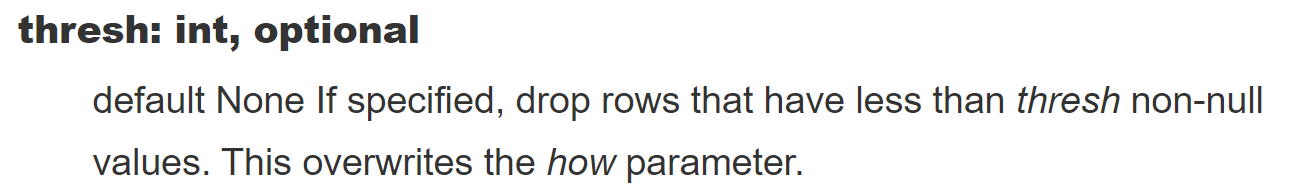

In [71]:
job_spark.dropna(subset=['Experience']).show()

+---+---------+----+----------+-------+
|_c0|     Name| Age|Experience| Salary|
+---+---------+----+----------+-------+
|  0|    Krish|31.0|      10.0|30000.0|
|  1|Sudhanshi|30.0|       8.0|25000.0|
|  2|    Sunny|29.0|       4.0|20000.0|
|  3|     Paul|24.0|       3.0|20000.0|
|  4|   Harsha|21.0|       1.0|15000.0|
|  5|  Shubham|23.0|       2.0|18000.0|
|  7|      NaN|34.0|      10.0|38000.0|
+---+---------+----+----------+-------+



In [81]:
job_spark.na.fill(value='Empty').show()

+---+---------+----+----------+-------+
|_c0|     Name| Age|Experience| Salary|
+---+---------+----+----------+-------+
|  0|    Krish|31.0|      10.0|30000.0|
|  1|Sudhanshi|30.0|       8.0|25000.0|
|  2|    Sunny|29.0|       4.0|20000.0|
|  3|     Paul|24.0|       3.0|20000.0|
|  4|   Harsha|21.0|       1.0|15000.0|
|  5|  Shubham|23.0|       2.0|18000.0|
|  6|   Mahesh|null|      null|40000.0|
|  7|      NaN|34.0|      10.0|38000.0|
|  8|    Empty|36.0|      null|   null|
+---+---------+----+----------+-------+



# [pyspark.ml.feature.Imputer](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.feature.Imputer.html#pyspark.ml.feature.Imputer.outputCols)

In [82]:
salaries = pd.DataFrame({
    'Name': ['Krish', 'Sudhanshi', 'Sunny', 'Paul', 'Harsha', 'Shubham'],
    'Age': [31, 30, 29, 24, 21, 23],
    'Experience': [10, 8, 4, 3, 1, 2],
    'Salary': [30000, 25000, 20000, 20000, 15000, 18000]
})
salaries.to_csv('salaries.csv')

In [86]:
spark = pyspark.read.csv('salaries.csv', header=True, inferSchema=True)
spark.show()

+---+---------+---+----------+------+
|_c0|     Name|Age|Experience|Salary|
+---+---------+---+----------+------+
|  0|    Krish| 31|        10| 30000|
|  1|Sudhanshi| 30|         8| 25000|
|  2|    Sunny| 29|         4| 20000|
|  3|     Paul| 24|         3| 20000|
|  4|   Harsha| 21|         1| 15000|
|  5|  Shubham| 23|         2| 18000|
+---+---------+---+----------+------+



In [91]:
# Salary equal or less than 20 000
spark.filter('Salary <= 20000').show()

+---+-------+---+----------+------+
|_c0|   Name|Age|Experience|Salary|
+---+-------+---+----------+------+
|  2|  Sunny| 29|         4| 20000|
|  3|   Paul| 24|         3| 20000|
|  4| Harsha| 21|         1| 15000|
|  5|Shubham| 23|         2| 18000|
+---+-------+---+----------+------+



In [93]:
(
    spark.filter('Salary <= 20000')
    .select(['Name', 'Age'])
    .show()
)

+-------+---+
|   Name|Age|
+-------+---+
|  Sunny| 29|
|   Paul| 24|
| Harsha| 21|
|Shubham| 23|
+-------+---+



In [96]:
(
    spark.filter(spark['Salary'] <= 20_000)
    .filter('Salary >= 17000')
    .show()
)

+---+-------+---+----------+------+
|_c0|   Name|Age|Experience|Salary|
+---+-------+---+----------+------+
|  2|  Sunny| 29|         4| 20000|
|  3|   Paul| 24|         3| 20000|
|  5|Shubham| 23|         2| 18000|
+---+-------+---+----------+------+



In [98]:
# ~ operator
spark.filter(~(spark['Salary'] <= 20_000)).show()

+---+---------+---+----------+------+
|_c0|     Name|Age|Experience|Salary|
+---+---------+---+----------+------+
|  0|    Krish| 31|        10| 30000|
|  1|Sudhanshi| 30|         8| 25000|
+---+---------+---+----------+------+



In [105]:
dataset = pd.DataFrame({
    'Name': ['Krish', 'Krish', 'Mahesh', 'Krish', 'Mahesh', 'Sudhanshu', 'Sudhanshu', 'Sudhanshu', 'Sunny', 'Sunny'],
    'Departments': ['Data Science', 'IOT', 'Big Data', 'Big Data', 'Data Science', 'Data Science', 'IOT', 'Big Data', 'Data Science', 'Big Data'],
    'Salary': [10000, 5000, 4000, 4000, 3000, 20000, 10000, 5000, 10000, 2000]
})
dataset.to_csv('Data.csv')

In [106]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('tutorial').getOrCreate()
pyspark = spark.read.csv('Data.csv', header=True, inferSchema=True)
pyspark.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Departments: string (nullable = true)
 |-- Salary: integer (nullable = true)



In [107]:
pyspark.show()

+---+---------+------------+------+
|_c0|     Name| Departments|Salary|
+---+---------+------------+------+
|  0|    Krish|Data Science| 10000|
|  1|    Krish|         IOT|  5000|
|  2|   Mahesh|    Big Data|  4000|
|  3|    Krish|    Big Data|  4000|
|  4|   Mahesh|Data Science|  3000|
|  5|Sudhanshu|Data Science| 20000|
|  6|Sudhanshu|         IOT| 10000|
|  7|Sudhanshu|    Big Data|  5000|
|  8|    Sunny|Data Science| 10000|
|  9|    Sunny|    Big Data|  2000|
+---+---------+------------+------+



## Group by operations

In [112]:
# Total salary
pyspark = pyspark.drop('_c0')
pyspark.groupBy('Name').sum().show()

+---------+-----------+
|     Name|sum(Salary)|
+---------+-----------+
|Sudhanshu|      35000|
|    Sunny|      12000|
|    Krish|      19000|
|   Mahesh|       7000|
+---------+-----------+



In [113]:
pyspark.groupBy('Departments').sum().show()

+------------+-----------+
| Departments|sum(Salary)|
+------------+-----------+
|         IOT|      15000|
|    Big Data|      15000|
|Data Science|      43000|
+------------+-----------+



In [114]:
# Mean salary per department
pyspark.groupBy('Departments').mean().show()

+------------+-----------+
| Departments|avg(Salary)|
+------------+-----------+
|         IOT|     7500.0|
|    Big Data|     3750.0|
|Data Science|    10750.0|
+------------+-----------+



In [115]:
# Team members
pyspark.groupBy('Departments').count().show()

+------------+-----+
| Departments|count|
+------------+-----+
|         IOT|    2|
|    Big Data|    4|
|Data Science|    4|
+------------+-----+



In [116]:
# Total salary for team
pyspark.agg({'Salary': 'sum'}).show()

+-----------+
|sum(Salary)|
+-----------+
|      73000|
+-----------+



# next: MLlib